In [16]:
import pandas as pd
df=pd.read_csv('./churn_data4.csv')
df

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,2853.325952,0.000000,1,1,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,2044.094146,83807.860000,1,0,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,3801.447619,19957.600000,3,1,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,3072.812564,0.000000,2,0,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,2918.856279,62755.410000,1,1,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,3072.812564,0.000000,2,1,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,1639.131714,5736.961000,1,1,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,3328.880278,0.000000,1,0,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,1787.507381,25025.103333,2,1,0,92888.52,high,1


In [17]:
bins = [0,35000,60000,100000,float('inf')]
labels = ['low', 'medium', 'high', 'very high']
df['salary_range'] = pd.cut(df['estimated_salary'], bins=bins,
                            labels=labels, include_lowest=True)

# 순서형 변수로 변환
df['salary_range'] = df['salary_range'].astype(pd.api.types.CategoricalDtype(categories=labels,
                                                                             ordered=True))

In [18]:
df

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,2853.325952,0.000000,1,1,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,2044.094146,83807.860000,1,0,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,3801.447619,19957.600000,3,1,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,3072.812564,0.000000,2,0,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,2918.856279,62755.410000,1,1,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,3072.812564,0.000000,2,1,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,1639.131714,5736.961000,1,1,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,3328.880278,0.000000,1,0,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,1787.507381,25025.103333,2,1,0,92888.52,high,1


# 추정 연봉 구간 나누고 이탈률 확인
### 구간에 따라 이탈률이 비슷하다

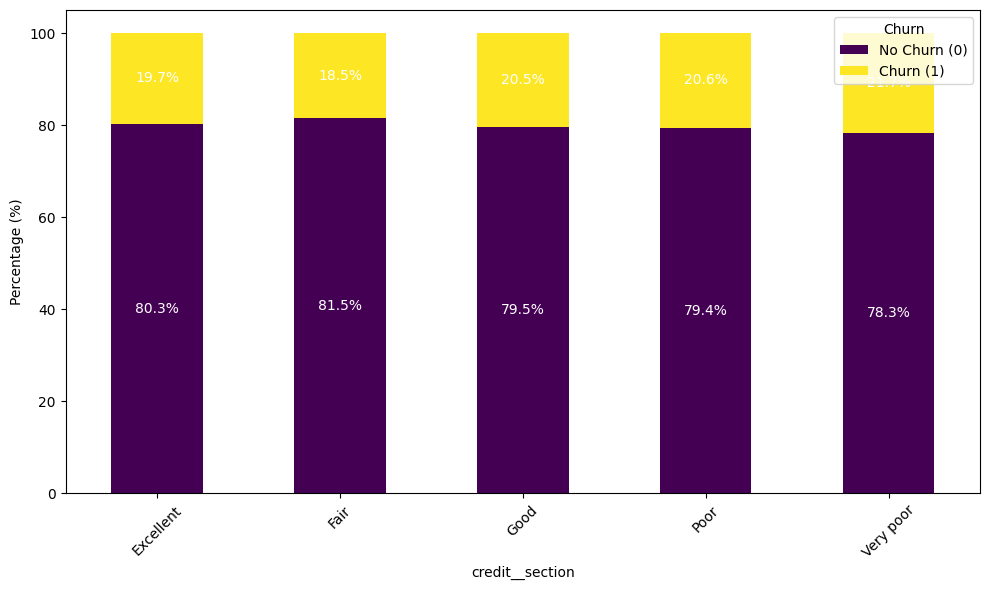

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹화하여 churn 값별 개수 계산
grouped_counts3 = df.groupby('credit__section')['churn'].value_counts().unstack(fill_value=0)

# 비율 계산
grouped_percentage3 = grouped_counts3.div(grouped_counts3.sum(axis=1), axis=0) * 100

# 비율 플롯 생성
plt.figure(figsize=(10, 6))

# Bar plot으로 비율 시각화
grouped_percentage3.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# 비율 표시
for i, (index, row) in enumerate(grouped_percentage3.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.cumsum().iloc[j] - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xlabel('credit__section')
plt.ylabel('Percentage (%)')
# plt.title('Churn Rate by balance_group')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df.columns

Index(['credit_score', 'credit__section', 'country', 'age', 'age_group',
       'gender', 'age_group_gender', 'tenure', 'balance', 'balance_group',
       'balance_per_age', 'balance_per_tenure', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'salary_range',
       'churn'],
      dtype='object')

In [21]:
df['salary_per_products']=df['estimated_salary'] / df['products_number']

df.insert(df.columns.get_loc('estimated_salary') - 1,
              'salary_per_products',
              df.pop('salary_per_products'))

csv_filename = 'grouped_data4.csv'
df.to_csv(csv_filename, index=False)

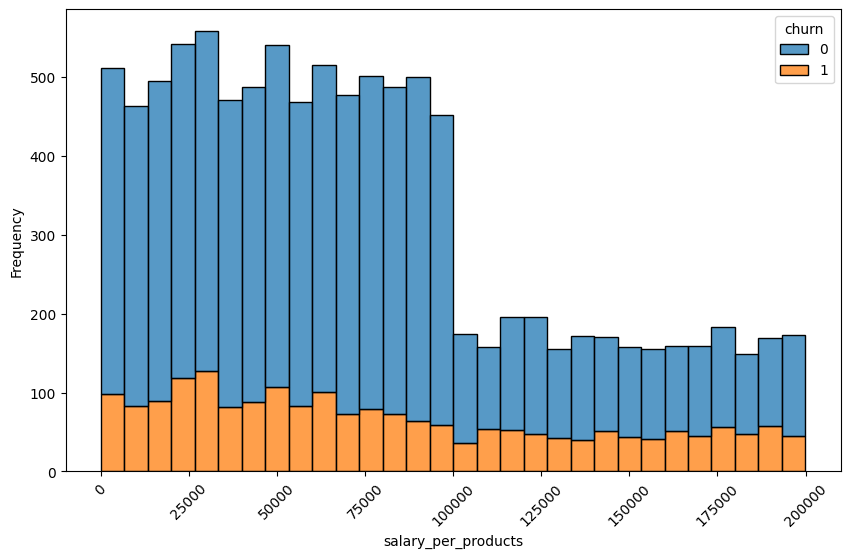

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이탈 여부에 따른 추정 봉급의 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary_per_products', hue='churn', multiple='stack', bins=30)
# plt.title('Estimated Salary Distribution by Churn Status')
plt.xlabel('salary_per_products')
# x축 레이블을 45도 기울이기
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# 변수가 데이터 값이 특정 기점을 기준으로 두 그룹을 나누는 양상을 보인다
# 절단점 cut off FloatingPointError

# 근데 정확한 절단점을 어떻게 찾지
# 케이민즈 클러스터링을 이용해 데이터의 군집을 나누고, 군집 간의 경계를 절단점으로 사용한다

# 표준화

In [24]:
df.columns

Index(['credit_score', 'credit__section', 'country', 'age', 'age_group',
       'gender', 'age_group_gender', 'tenure', 'balance', 'balance_group',
       'balance_per_age', 'balance_per_tenure', 'products_number',
       'credit_card', 'salary_per_products', 'active_member',
       'estimated_salary', 'salary_range', 'churn'],
      dtype='object')